### Notebook 2: Initial Exploration of Avocado Data

This notebook contains the first series of models performed on this Price Elasticity Project: Linear Regression Modelling. The goal of this modeling is to determine any linear relationships between features and the Price Elasticity of Demand for Avocados.

Import the needed libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Read in the dataset we want to use.

In [49]:
totalus = pd.read_csv('data/totalus_eod.csv')
totalus.head(3)

,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod,total_volume_million
0,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS,NaN,NaN,NaN,31.324278
1,2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS,-0.072,0.063,-1.142857,29.063543
2,2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS,-0.001,0.020,-0.050000,29.043459


In [50]:
totalus.shape

(158, 17)

In [51]:
#drop the Nan values in the dataset
totalus.dropna(inplace = True)
totalus.shape

(157, 17)

Since we are going to use a Linear Regression model, we are looking for any linear relationships between features and price elasticity. I'm going to do some initial plotting to get a feel for any of those relationships, then get into the modelling.

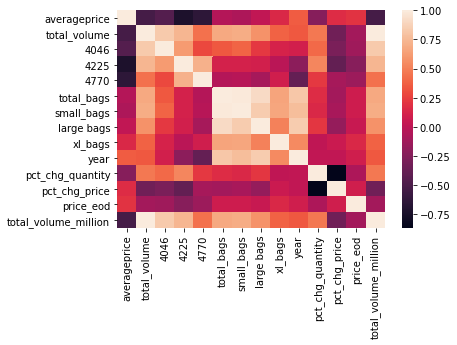

In [52]:
sns.heatmap(totalus.corr())

In [53]:
totalus.corr()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,year,pct_chg_quantity,pct_chg_price,price_eod,total_volume_million
averageprice,1.000000,-0.525359,-0.450516,-0.724810,-0.645046,-0.038251,-0.070209,0.018716,0.151151,0.362458,-0.232148,0.175594,0.204880,-0.525359
total_volume,-0.525359,1.000000,0.839256,0.742438,0.441717,0.683919,0.697583,0.583217,0.382518,0.348359,0.473157,-0.330337,-0.109231,1.000000
4046,-0.450516,0.839256,1.000000,0.620155,0.287699,0.348969,0.392337,0.223993,0.118785,0.099392,0.414148,-0.288038,-0.127366,0.839256
4225,-0.724810,0.742438,0.620155,1.000000,0.719251,0.112014,0.116734,0.097817,-0.009262,-0.207391,0.529368,-0.388818,-0.224611,0.742438
4770,-0.645046,0.441717,0.287699,0.719251,1.000000,-0.040603,-0.020959,-0.093600,0.094966,-0.378523,0.220340,-0.093783,-0.139254,0.441717
total_bags,-0.038251,0.683919,0.348969,0.112014,-0.040603,1.000000,0.985955,0.918303,0.660395,0.824317,0.171282,-0.113764,0.076796,0.683919
small_bags,-0.070209,0.697583,0.392337,0.116734,-0.020959,0.985955,1.000000,0.840710,0.668235,0.774601,0.148796,-0.091055,0.079280,0.697583
large bags,0.018716,0.583217,0.223993,0.097817,-0.093600,0.918303,0.840710,1.000000,0.506058,0.843113,0.213786,-0.167455,0.051438,0.583217
xl_bags,0.151151,0.382518,0.118785,-0.009262,0.094966,0.660395,0.668235,0.506058,1.000000,0.542163,0.010341,0.065626,0.151582,0.382518
year,0.362458,0.348359,0.099392,-0.207391,-0.378523,0.824317,0.774601,0.843113,0.542163,1.000000,0.021860,0.021487,0.089707,0.348359


Removing those -inf and inf outliers seems to have changed the correlation results a little bit, which is interesting. Previously, averageprice had a correlation coeff of .05, now it more strongly correlated at 0.2. The total_volume feature mostly retains its coefficient at -.11 (previously -0.14). These are still fairly small correlations, but I plan to do some feature engineering to see what else might be related to price elasticity and our target for modelling, which is total_volume.

Let's get started with the modelling now, and I want to take time to set up the problem: Our ultimate goal is to be able to predict the volume of avocado sales so that we can predict our costs and revenues. We have ~3 years of data we can to make this prediction, and obviously we could just take whatever the average is across the years and use that to start with, but we want to be able to do better than that. So, let's see if we can get a better prediction.

To start off simply, I'm going to compare year, averageprice, price_eod and total_volume. For me, the modelling process is iterative, so I usually start small and work my way up as I get more and more of a feel for the data. also, since we have four years of data, I'm going to use the data from 2015 to 2017 to try to predict the total volume of avocados for 2018.

In [54]:
small_totalus = totalus[['total_volume_million', 'year', 'averageprice', 'price_eod']]
small_totalus

,total_volume_million,year,averageprice,price_eod
1,29.063543,2015,1.01,-1.142857
2,29.043459,2015,1.03,-0.050000
3,28.470311,2015,1.04,-2.000000
4,44.655462,2015,0.89,-3.944444
5,32.137333,2015,0.95,-4.179104
...,...,...,...,...
153,40.021529,2018,1.06,-4.736842
154,40.741214,2018,1.07,2.000000
155,40.449603,2018,1.09,-0.368421
156,41.386314,2018,1.05,-0.621622


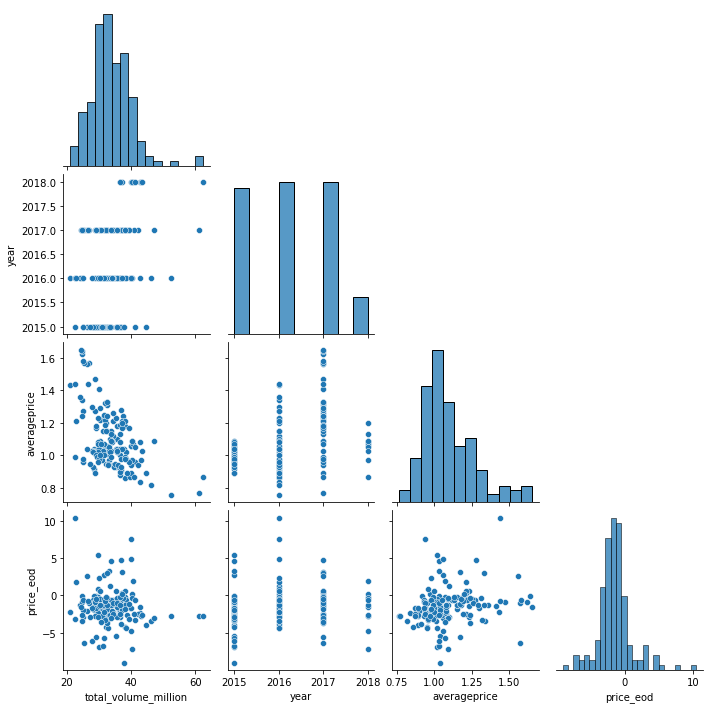

In [55]:
#Make a quick pairplot to see the correlations
sns.pairplot(small_totalus, corner = True)

In [ ]:
#Now of those initial features compared above, the average price had the strongest correlation with a -0.52. This tell me that the pricing 
#of the avocados is something we should look further into (and worth the investigation into price elasticity)

Do a train, test, split on the data. Since we have data for 2015 through 2018, let's make things simple and use 2015-2017 to try to predict 2018's total sales volume.

In [56]:
traindata = small_totalus[small_totalus['year'] < 2018]
testdata  = small_totalus[small_totalus['year'] == 2018]
traindata.tail()

,total_volume_million,year,averageprice,price_eod
141,33.824253,2017,1.09,-3.057851
142,35.634913,2017,1.03,-0.981818
143,30.757767,2017,1.07,-3.512821
144,29.102349,2017,1.18,-0.524272
145,38.267342,2017,0.98,-1.863905


In [67]:
#To create the null model, I plan to use the mean of the total_volume for years 2015-2017 to estimate the total_volume for 2018.
traindata['total_volume_million'].mean()
#The average is 42.13 million avocados, so if I just used the mean, I would predict that the following year (2018) would bring me 42.13 million avocados

42.12553335250001

In [68]:
#Identify my x (my features) and my y (my target).
x_train = traindata[['year', 'averageprice', 'price_eod']]
y_train = traindata['total_volume_million']
x_test  = testdata[['year', 'averageprice', 'price_eod']]
y_test  = testdata[['total_volume_million']]

In [69]:
#Instantiate my model
lr = LinearRegression()

In [70]:
#fit my model
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred = lr.predict(x_test)
#y_pred

In [72]:
#Compute the mean_squared_error for our predictions
y = testdata['total_volume_million']
mean_squared_error(y, y_pred)

24.129945474984666

In [73]:
#Now compare to our null model.
y_train_mean = np.full_like(y, traindata['total_volume_million'].mean())
mean_squared_error(y, y_train_mean)

125.42960905337645

In [ ]:
#Notes: Many of the columns/features we have aren't very helpful in terms of being possible predictors for volume of avocados sold. The columns I have 
#are mostly different ways of breaking down the total volume into different components. I need to engineer some features that could be better predictors,
#like months of the year and region. We already know that some regions produce more avocados than others, but which are better predictors? These are fun
#things to explore!